In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from PIL import Image
import requests
from io import BytesIO

In [3]:
from sklearn.decomposition import PCA

In [4]:
label=pd.read_csv("faces_train_y.csv", index_col=0)

In [5]:
from numpy import load

data = load('faces_train_x.npz')
lst = data.files


In [58]:
data_t = load('faces_test_x.npz')
lst_t = data.files

In [60]:
np.shape(data_t[item])

(348, 62, 47)

In [61]:
photos_t=data_t[item].reshape(348,2914)

In [62]:
test = photos_t.astype(float)
test

array([[113.66666412, 115.66666412, 100.        , ...,  90.        ,
         83.        , 101.        ],
       [ 65.        ,  75.        ,  88.        , ..., 145.66667175,
        188.        , 202.33332825],
       [ 90.33333588,  92.        ,  95.        , ..., 188.66667175,
        195.        , 199.        ],
       ...,
       [ 42.        ,  41.33333206,  38.        , ..., 153.66667175,
        136.66667175, 121.        ],
       [ 79.33333588,  91.33333588, 101.66666412, ...,  26.33333397,
         29.33333397,  30.66666603],
       [110.        , 105.66666412,  98.33333588, ...,  33.66666794,
         26.33333397,   8.66666698]])

In [8]:
np.shape(data[item])

(1000, 62, 47)

In [9]:
photos=data[item].reshape(1000,2914)

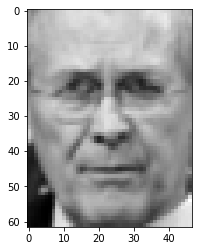

In [10]:
plt.imshow(data[item][9], cmap='gray')

In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [51]:
X_train, X_test, y_train, y_test = train_test_split(photos.astype(float), label,
                                                    test_size=0.2, shuffle=True)

In [52]:
pca = PCA(n_components = 150, svd_solver ='randomized',
          whiten = True).fit(X_train)

In [53]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [54]:
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(
    SVC(kernel ='rbf', class_weight ='balanced'), param_grid
)
clf = clf.fit(X_train_pca, y_train)
print(clf.best_estimator_)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

SVC(C=1000.0, class_weight='balanced', gamma=0.001)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [55]:
y_pred = clf.predict(X_test_pca)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.85      0.90      0.88        31
           2       0.81      0.81      0.81        16
           3       0.82      0.96      0.88        75
           4       0.75      0.57      0.65        21
           5       1.00      0.60      0.75        10
           6       1.00      1.00      1.00        13
           7       0.86      0.70      0.78        27

    accuracy                           0.84       200
   macro avg       0.87      0.78      0.81       200
weighted avg       0.84      0.84      0.83       200



In [63]:
test_pca = pca.transform(test)

In [67]:
predicts = clf.predict(test_pca)
pd.DataFrame({'Predicted': predicts}).to_csv('faces_1.csv', index_label='Id')

In [66]:
len(predicts)

348